In [1]:
import numpy as np
from phc import module_reload
#module_reload('zhh')
from zhh import get_runtime_analysis, evaluate_runtime, get_adjusted_time_per_event, get_sample_chunk_splits, get_process_normalization
from typing import Optional
from math import floor, ceil

version = 'v1'
REPO_ROOT = '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/ZHH'
DATA_ROOT = f'/nfs/dust/ilc/user/bliewert/zhh/PreselectionRuntime/{version}'
ILD_VERSION = 'ILD_l5_o1_v02'
PROD_NAME = '500-TDR_ws'

PROCESS_INDEX = '/afs/desy.de/user/b/bliewert/nfs/zhh/CreateRawIndex/v1/processes.npy'
SAMPLE_INDEX = '/afs/desy.de/user/b/bliewert/nfs/zhh/CreateRawIndex/v1/samples.npy'

processes = np.load(PROCESS_INDEX)
samples = np.load(SAMPLE_INDEX)

In [2]:
np.unique(processes['process'])

array(['2f_z_bhabhag', '2f_z_bhabhang', '2f_z_h', '2f_z_l', '2f_z_nung',
       '4f_lowmee_sze_l', '4f_lowmee_szeorsw_l', '4f_sw_l', '4f_sw_sl',
       '4f_sze_l', '4f_sze_sl', '4f_szeorsw_l', '4f_sznu_l', '4f_sznu_sl',
       '4f_ww_h', '4f_ww_l', '4f_ww_sl', '4f_zz_h', '4f_zz_l', '4f_zz_sl',
       '4f_zzorww_h', '4f_zzorww_l', 'e1e1hh', 'e1e1qqh', 'e2e2hh',
       'e2e2qqh', 'e3e3hh', 'e3e3qqh', 'eeeeee', 'eeeell', 'eeeexx',
       'eeeeyy', 'eellxx', 'eellyy', 'eeveev', 'eevelv', 'eeveyx',
       'eevlev', 'eevllv', 'eevlyx', 'eexyev', 'eexylv', 'eexyyx',
       'llllee', 'llllll', 'llvelv', 'llveyx', 'llvlev', 'llvllv',
       'llvlyx', 'llxyev', 'llxylv', 'llxyyx', 'n1n1hh', 'n1n1qqh',
       'n23n23hh', 'n23n23qqh', 'qqhh', 'qqqqh', 'vvveev', 'vvvelv',
       'vvveyx', 'vvvlev', 'vvvllv', 'vvvlyx', 'vvvvxx', 'vvvvyy',
       'vvxyev', 'vvxylv', 'vvxyyx', 'xxveev', 'xxvelv', 'xxveyx',
       'xxvlev', 'xxvllv', 'xxvlyx', 'xxxxee', 'xxxxll', 'xxxxvv',
       'xxxxxx', 'xxxyev', 'x

In [3]:
module_reload('zhh')
from zhh import get_process_normalization, get_sample_chunk_splits

pn = get_process_normalization(processes, samples, GAIN=46)
np.sum(pn['n_events_tot'] < pn['n_events_normalized'])

/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/ZHH/zhh/analysis/Normalization.py:52: RuntimeWarning: divide by zero encountered in divide
  norm_by = results['n_events_tot'] / results['n_events_expected']


0

In [5]:
pn

array([('2f_z_bhabhag', '2f_z_bhabhag_LL', 2.96197998e+03, 5.47643948e+00,   681482,   3732094,   681482),
       ('2f_z_bhabhag', '2f_z_bhabhag_LR', 3.64515991e+03, 1.25163603e+01,   681482,   8529674,   681482),
       ('2f_z_bhabhag', '2f_z_bhabhag_RL', 3.37210010e+03, 6.92746103e-01,   681482,    472094,   474575),
       ('2f_z_bhabhag', '2f_z_bhabhag_RR', 2.95691992e+03, 1.12812841e+00,   681482,    768799,   681482),
       ('2f_z_bhabhang', '2f_z_bhabhang_LL', 1.23911102e+05, 1.30522156e+01, 11961800, 156127987, 11961800),
       ('2f_z_bhabhang', '2f_z_bhabhang_LR', 1.33070797e+05, 2.60316734e+01, 11961800, 311385664, 11961800),
       ('2f_z_bhabhang', '2f_z_bhabhang_RL', 1.30234703e+05, 1.52425706e+00, 11961800,  18232858, 11961800),
       ('2f_z_bhabhang', '2f_z_bhabhang_RR', 1.23916500e+05, 2.69343162e+00, 11961800,  32218290, 11961800),
       ('2f_z_h', '2f_z_h_LR', 3.24705000e+04, 3.23094101e+01,  2351667,  75980970,  2351667),
       ('2f_z_h', '2f_z_h_RL', 1.79946992

In [6]:
scs = get_sample_chunk_splits(samples, process_normalization=pn)

In [17]:
scs

array([(   0, '2f_z_bhabhag', '2f_z_bhabhag_LL', '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_8.slcio', 18800, 0, 0),
       (   1, '2f_z_bhabhag', '2f_z_bhabhag_LL', '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_3.slcio', 18800, 1, 0),
       (   2, '2f_z_bhabhag', '2f_z_bhabhag_LL', '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_5.slcio', 18800, 2, 0),
       ...,
       (2758, 'yyyyvv', 'yyyyvv_RL', '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/6f_yyyyZ/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I108686.Pyyyyvv.eR

In [18]:
len(scs)

2761

In [9]:
for s in scs:
    print(f'{s["proc_pol"]} : {s["chunk_start"]} - {s["chunk_size"]}')

2f_z_bhabhag_LL : 0 - 18800
2f_z_bhabhag_LL : 18800 - 18800
2f_z_bhabhag_LL : 37600 - 18800
2f_z_bhabhag_LL : 56400 - 18800
2f_z_bhabhag_LL : 75200 - 18800
2f_z_bhabhag_LL : 94000 - 18800
2f_z_bhabhag_LL : 112800 - 18800
2f_z_bhabhag_LL : 131600 - 18800
2f_z_bhabhag_LL : 150400 - 18800
2f_z_bhabhag_LL : 169200 - 1485
2f_z_bhabhag_LR : 0 - 18800
2f_z_bhabhag_LR : 18800 - 18800
2f_z_bhabhag_LR : 37600 - 18800
2f_z_bhabhag_LR : 56400 - 18800
2f_z_bhabhag_LR : 75200 - 18800
2f_z_bhabhag_LR : 94000 - 18800
2f_z_bhabhag_LR : 112800 - 18800
2f_z_bhabhag_LR : 131600 - 871
2f_z_bhabhag_LR : 132471 - 18800
2f_z_bhabhag_LR : 151271 - 18800
2f_z_bhabhag_RL : 0 - 18800
2f_z_bhabhag_RL : 18800 - 18800
2f_z_bhabhag_RL : 37600 - 18800
2f_z_bhabhag_RL : 56400 - 18800
2f_z_bhabhag_RL : 75200 - 18800
2f_z_bhabhag_RL : 94000 - 18800
2f_z_bhabhag_RL : 112800 - 18800
2f_z_bhabhag_RL : 131600 - 18800
2f_z_bhabhag_RL : 150400 - 916
2f_z_bhabhag_RL : 151316 - 18800
2f_z_bhabhag_RR : 0 - 18800
2f_z_bhabhag_RR :

In [3]:
scs = np.load('/afs/desy.de/user/b/bliewert/nfs/zhh/CreatePreselectionChunks/v1/chunks.npy')

In [4]:
import os.path as osp
for s in scs:
    print(f'{s["branch"]} {osp.basename(s["location"])} : {s["chunk_start"]} - {s["chunk_size"]}')

0 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_8.slcio : 0 - 18800
1 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_3.slcio : 0 - 18800
2 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_5.slcio : 0 - 18800
3 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_1.slcio : 0 - 18800
4 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_6.slcio : 0 - 18800
5 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_0.slcio : 0 - 18800
6 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_2.slcio : 0 - 18800
7 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_7.slcio : 0 - 18800
8 rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z

In [20]:
scs[scs['branch'] == 242]

array([(242, '2f_z_bhabhang', '2f_z_bhabhang_LR', '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhaNg/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250127.P2f_z_bhabhang.eL.pR.n006.d_dstm_10609_109.slcio', 18600, 41, 0)],
      dtype=[('branch', '<i4'), ('process', '<U60'), ('proc_pol', '<U64'), ('location', '<U512'), ('chunk_size', '<i4'), ('n_chunks', '<i4'), ('chunk_start', '<i4')])

In [15]:
dev_loc = '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_5.slcio'
samples[samples['location'] == dev_loc]

array([(250101, '2f_z_bhabhag', '2f_z_bhabhag_LL', 18800, -1, -1, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_5.slcio')],
      dtype=[('run_id', '<i4'), ('process', '<U60'), ('proc_pol', '<U64'), ('n_events', '<i4'), ('pol_e', '<i4'), ('pol_p', '<i4'), ('location', '<U512')])

Runtime Analysis

In [2]:
runtime_analysis = get_runtime_analysis(DATA_ROOT=DATA_ROOT)
runtime_analysis

array([(  0, '2f_z_bhabhag', 49, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250101.P2f_z_bhabhag.eL.pL.n001.d_dstm_10366_0.slcio', 1.7236498e+09, 1.7236498e+09, 5.000e+00, -1),
       (  1, '2f_z_bhabhag', 49, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250102.P2f_z_bhabhag.eL.pR.n001.d_dstm_10366_0.slcio', 1.7236498e+09, 1.7236498e+09, 3.000e+00, -1),
       (  2, '2f_z_bhabhag', 49, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250104.P2f_z_bhabhag.eR.pL.n001.d_dstm_10366_0.slcio', 1.7236498e+09, 1.7236498e+09, 4.000e+00, -1),
       (  3, '2f_z_bhabhag', 49, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhag/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o

In [20]:
tD = runtime_analysis['tDuration']
print(f'{np.min(tD)} : {np.max(tD)}')

1.0 : 741.0


In [6]:
atpe = get_adjusted_time_per_event(runtime_analysis, True)
atpe

array([('2f_z_bhabhag',   4.       , 49,   2.       ),
       ('2f_z_bhabhang',   2.5      , 49,   1.25     ),
       ('2f_z_h',  71.       , 49,  35.5      ),
       ('2f_z_l',   5.5      , 49,   2.75     ),
       ('2f_z_nung',   2.5      , 49,   1.25     ),
       ('4f_lowmee_sze_l',   3.75     , 49,   1.875    ),
       ('4f_lowmee_szeorsw_l',   4.5      , 49,   2.25     ),
       ('4f_sw_l',   2.75     , 49,   1.375    ),
       ('4f_sw_sl',  13.       , 49,   6.5      ),
       ('4f_sze_l',   3.25     , 49,   1.625    ),
       ('4f_sze_sl',  29.25     , 49,  14.625    ),
       ('4f_szeorsw_l',   3.5      , 49,   1.7500001),
       ('4f_sznu_l',   2.5      , 49,   1.25     ),
       ('4f_sznu_sl',  46.5      , 49,  23.25     ),
       ('4f_ww_h',  18.5      , 49,   9.25     ),
       ('4f_ww_l',   6.       , 49,   3.       ),
       ('4f_ww_sl',  22.       , 49,  11.       ),
       ('4f_zz_h', 114.5      , 49,  57.25     ),
       ('4f_zz_l',   6.       , 49,   3.       ),
    

In [5]:
import matplotlib.pyplot as plt

In [28]:
sorted_atpe = atpe[np.argsort(atpe['tPE'])][:12]
sorted_atpe

array([('eeveev', 2.  , 49, 1.       ),
       ('2f_z_bhabhang', 2.5 , 49, 1.25     ),
       ('vvveev', 2.5 , 49, 1.25     ),
       ('2f_z_nung', 2.5 , 49, 1.25     ),
       ('4f_sznu_l', 2.5 , 49, 1.25     ),
       ('4f_sw_l', 2.75, 49, 1.375    ),
       ('4f_sze_l', 3.25, 49, 1.625    ),
       ('4f_szeorsw_l', 3.5 , 49, 1.7500001),
       ('4f_lowmee_sze_l', 3.75, 49, 1.875    ),
       ('2f_z_bhabhag', 4.  , 49, 2.       ),
       ('eeeeee', 4.5 , 49, 2.25     ), ('eeeell', 4.5 , 49, 2.25     )],
      dtype=[('process', '<U64'), ('tAvg', '<f4'), ('n_processed', '<i4'), ('tPE', '<f4')])

Text(0, 0.5, 'time per event [s]')

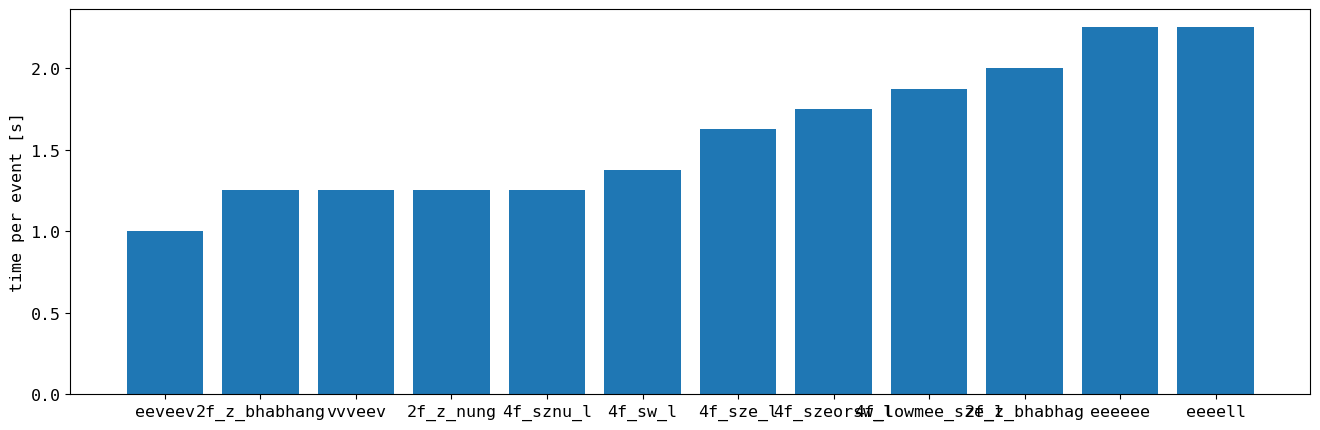

In [29]:
fig, ax = plt.subplots(figsize=(16, 5)) 
ax.bar(sorted_atpe['process'], sorted_atpe['tPE'])
ax.set_ylabel('time per event [s]')

In [14]:
n_before = 0
n_after = 0

for process in np.unique(samples['process']):
    entry = adjusted_time_per_event[adjusted_time_per_event["process"] == process]
    
    n_samples = np.sum(samples["process"] == process)
    n_samples_adj = n_samples*entry['tPE']
    print(f'{process} -> {n_samples} -> {n_samples_adj}')
    
    n_before += n_samples
    n_after += ceil(n_samples_adj)
    
print(f'Before {n_before} | After {n_after}')

2f_z_bhabhag -> 40 -> [40.]
2f_z_bhabhang -> 646 -> [646.]
2f_z_h -> 230 -> [1150.]
2f_z_l -> 24 -> [24.]
2f_z_nung -> 477 -> [477.]
4f_lowmee_sze_l -> 4 -> [4.]
4f_lowmee_szeorsw_l -> 4 -> [4.]
4f_sw_l -> 56 -> [56.]
4f_sw_sl -> 38 -> [190.]
4f_sze_l -> 269 -> [269.]
4f_sze_sl -> 36 -> [180.]
4f_szeorsw_l -> 36 -> [36.]
4f_sznu_l -> 5 -> [5.]
4f_sznu_sl -> 11 -> [55.]
4f_ww_h -> 55 -> [247.5]
4f_ww_l -> 7 -> [21.]
4f_ww_sl -> 43 -> [172.]
4f_zz_h -> 11 -> [55.]
4f_zz_l -> 2 -> [2.]
4f_zz_sl -> 41 -> [205.]
4f_zzorww_h -> 48 -> [240.]
4f_zzorww_l -> 15 -> [15.]
e1e1hh -> 121 -> [605.]
e1e1qqh -> 80 -> [400.]
e2e2hh -> 60 -> [300.]
e2e2qqh -> 42 -> [210.]
e3e3hh -> 59 -> [295.]
e3e3qqh -> 42 -> [210.]
eeeeee -> 4 -> [4.]
eeeell -> 4 -> [4.]
eeeexx -> 4 -> [17.]
eeeeyy -> 4 -> [20.]
eellxx -> 4 -> [20.]
eellyy -> 4 -> [20.]
eeveev -> 4 -> [4.]
eevelv -> 4 -> [12.]
eeveyx -> 10 -> [50.]
eevlev -> 4 -> [4.]
eevllv -> 5 -> [5.]
eevlyx -> 14 -> [49.]
eexyev -> 10 -> [30.]
eexylv -> 13 -> [48

In [9]:
samples[samples['process'] == 'eevlev']

array([(108628, 'eevlev', 'eevlev_LR', 14948, -1,  1, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/6f_eeWW/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I108628.Peevlev.eL.pR.n001.d_dstm_10361_0.slcio'),
       (108629, 'eevlev', 'eevlev_RL', 10000,  1, -1, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/6f_eeWW/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I108629.Peevlev.eR.pL.n001.d_dstm_10361_0.slcio'),
       (108630, 'eevlev', 'eevlev_RR', 10000,  1,  1, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/6f_eeWW/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I108630.Peevlev.eR.pR.n001.d_dstm_10361_0.slcio'),
       (108627, 'eevlev', 'eevlev_LL', 10000, -1, -1, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/6f_eeWW/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I108627.Peevlev.eL.pL.n001.d_dstm_10361_0.slcio')],
      dtype=[('run_

In [42]:
c = np.load('/nfs/dust/ilc/user/bliewert/zhh/CreatePreselectionChunks/v1/chunks.npy', allow_pickle=True)

In [43]:
c

array([('2f_z_bhabhang', '2f_z_bhabhang_LR', '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhaNg/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250127.P2f_z_bhabhang.eL.pR.n005.d_dstm_10609_88.slcio', 18600, 1,    0),
       ('qqhh', 'qqhh_RL', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015747/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403010.Pqqhh.eR.pL.n012.d_dstm_15747_103.slcio',  1197, 5,    0),
       ('qqhh', 'qqhh_RL', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015747/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403010.Pqqhh.eR.pL.n012.d_dstm_15747_103.slcio',  1197, 5, 1197),
       ...,
       ('yyvlyx', 'yyvlyx_LR', '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/6f_ttbar/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I108673.Pyyvlyx.eL.pR.n006.d_dstm_10276_14.slcio',  1388, 5,

In [44]:
len(c)

12272

In [23]:
#s = samples[0]
s = samples[samples['run_id'] == 108628]
print(s)



[(108628, 'eevlev', 'eevlev_LR', 14948, -1, 1, '/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/6f_eeWW/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I108628.Peevlev.eL.pR.n001.d_dstm_10361_0.slcio')]


In [36]:
sample_chunk_splits = get_sample_chunk_splits(samples[:10], adjusted_time_per_event)

In [37]:
len(sample_chunk_splits)

33

In [38]:
res = {}
i = 0
for comb in sample_chunk_splits:
    res[i] = (comb['location'], comb['chunk_start'], comb['chunk_size'])
    i += 1

In [39]:
res

{0: ('/pnfs/desy.de/ilc/prod/ilc/ild/copy/dst-merged/500-TDR_ws/2f_Z_bhabhaNg/ILD_l5_o1_v02/v02-00-01/rv02-00-01.sv02-00-01.mILD_l5_o1_v02.E500-TDR_ws.I250127.P2f_z_bhabhang.eL.pR.n005.d_dstm_10609_88.slcio',
  0,
  18600),
 1: ('/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015747/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403010.Pqqhh.eR.pL.n012.d_dstm_15747_103.slcio',
  0,
  1197),
 2: ('/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015747/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403010.Pqqhh.eR.pL.n012.d_dstm_15747_103.slcio',
  1197,
  1197),
 3: ('/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015747/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403010.Pqqhh.eR.pL.n012.d_dstm_15747_103.slcio',
  2394,
  1197),
 4: ('/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015747/000/rv0

In [25]:
for comb in sample_chunk_splits[['chunk_size', 'proc_pol']]:
    print(comb)

(8858, '2f_z_bhabhang_LR')
(8858, '2f_z_bhabhang_LR')
(1197, 'qqhh_RL')
(1197, 'qqhh_RL')
(1197, 'qqhh_RL')
(1197, 'qqhh_RL')
(1197, 'qqhh_RL')
(1600, 'e3e3hh_LR')
(1600, 'e3e3hh_LR')
(1600, 'e3e3hh_LR')
(1600, 'e3e3hh_LR')
(1280, 'n23n23qqh_LR')
(1280, 'n23n23qqh_LR')
(1280, 'n23n23qqh_LR')
(1280, 'n23n23qqh_LR')
(18462, '2f_z_nung_LR')
(18462, '2f_z_nung_LR')
(1644, 'n23n23qqh_RL')
(1644, 'n23n23qqh_RL')
(1644, 'n23n23qqh_RL')
(1644, 'n23n23qqh_RL')
(1644, 'n23n23qqh_RL')
(2000, 'yyvllv_LR')
(2000, 'yyvllv_LR')
(2000, 'yyvllv_LR')
(2000, 'yyvllv_LR')
(1033, '4f_lowmee_sze_l_LR')
(1033, '4f_lowmee_sze_l_LR')
(1680, 'n23n23qqh_RL')
(1680, 'n23n23qqh_RL')
(1680, 'n23n23qqh_RL')
(1680, 'n23n23qqh_RL')
(1400, 'yyveyx_LR')
(1400, 'yyveyx_LR')
(1400, 'yyveyx_LR')
(1400, 'yyveyx_LR')
(2621, '2f_z_h_LR')
(2621, '2f_z_h_LR')
(2621, '2f_z_h_LR')
(1400, 'yyveyx_LR')
(1400, 'yyveyx_LR')
(1400, 'yyveyx_LR')
(1400, 'yyveyx_LR')
(1954, 'xxxyyx_LR')
(1954, 'xxxyyx_LR')
(1015, 'yycyyc_RL')
(1015, 'yyc

In [20]:
samples['proc_pol']

array(['2f_z_bhabhang_LR', 'qqhh_RL', 'e3e3hh_LR', ..., '4f_sze_l_LR',
       'qqhh_LR', 'yyvlyx_LR'], dtype='<U64')

In [24]:
sample_chunk_splits['chunk_size']

array([8858, 8858, 1197, ..., 1388, 1388, 1388], dtype=int32)